# **Os dados não mentem** - Por que a Marvel é melhor que a DC (parte 1)
---

Você, talvez como todo nerd que se preze, já deve ter se perguntado ou se deparado com a seguinte questão: *Quem é melhor? Marvel ou DC?*

Como parte dos meus estudos em Data Science, resolvi fazer uma análise de dados em cima dessa discussão `polêmica`.

Mas, antes que você pegue o seu caderno de argumentos e brigue comigo, iremos analisar de maneira *objetiva* os dados de alguns filmes da Marvel e da DC.

# **Configurando o ambiente**

O [Colab](https://colab.research.google.com/notebooks/intro.ipynb) é uma ferramenta da Google que fornece um ambiente para desenvolvimento em Python muito parecido com o Jupyter Notebook e é o que irei utilizar.

Como o ambiente é online, não é preciso instalar nenhum programa adicional, além de trazer diversas bibliotecas já pré-instaladas e prontas para serem importadas. Uma dessas bibliotecas é o **Pandas**, o melhor amigo de todo cientista de dados.

Começaremos importando essa biblioteca com o comando **import** e dando um apelido **pd**, uma convenção útil para evitar que outros métodos em python se sobreponham aos métodos do Pandas. Dessa forma, sempre que fomos chamar algum método dessa biblioteca, temos que utilizar a seguinte forma: `pd.<método>`

In [1]:
import pandas as pd

Outra biblioteca muito comum é o **Seaborn**, utilizada para plotar gráficos de diversos tipos. Apesar de existirem outras bibliotecas até mais poderosas com o mesmo objetivo, como o **Matplotlib**, o Seaborn é mais simples e fácil de utilizar, como veremos mais pra frente.

Vamos importá-la de forma semelhante ao que fizemos com o Pandas e logo em seguida, configurar o tema dos nossos gráficos para um fundo mais claro.

In [2]:
import seaborn as sns
sns.set_style("whitegrid")

# **Primeiras Análises**

No site [Kaggle](https://www.kaggle.com/), é possível encontrar alguns datasets disponibilizados pela comunidade. Escolhi este para iniciar nossa breve análise de dados. A temática deste dataset é **Marvel vs DC**, o embate do século! Quais filmes são melhores? Quais deram mais lucro ou tiveram um maior orçamento?


Vou tentar responder algumas dessas perguntas apenas analisando alguns dados deste dataset. Caso tenham interesse nele, podem [acessar aqui](https://www.kaggle.com/leonardopena/marvel-vs-dc/).



Vamos começar importando-o com o método **pd.read_csv()** e configurar para não importar a primeira linha com o nome das colunas, usando o parâmetro *index_col = 0*.

Logo em seguida, vamos utilizar o método **pd.head()** para listar as cinco primeiras linhas do nosso conjunto de dados. Podemos listar um número maior ou menor, passando como parâmetro da função.

In [3]:
db1 = pd.read_csv('db1.csv', index_col = 0)
db1.head()

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
1,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
2,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
3,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
4,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
5,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774


Como podemos ver, temos algumas informações importantes para a nossa análise, como nome, nota do IMDB e duração em minutos para cada filme.

Mas antes, vamos separar os filmes de cada universo para um melhor entendimento, selecionando algumas linhas.

No Pandas, o nome das colunas pode ser usado pra acessar seus valores:
`db['coluna']` ou `db.coluna`.

Para filtrar algumas linhas, podemos passar a condição do filtro diretamente como índice:

```
filtro = db['coluna'] condição
db[filtro]
```


Dessa forma, na linha 5 filtramos a coluna *Company* com o valor *Marvel*.
Na última linha, utilizamos a função **describe()** para obter um resumo estatísticos das colunas do dataset, como média, valores min e/ou máx e etc.

In [6]:
# condição do filtro
filter = db1['Company'] == 'Marvel'

# filtrando
marvel = db1[filter]
marvel.describe()

,Rate,Metascore,Release,Opening Weekend USA,Gross USA,Gross Worldwide
count,23.000000,23.000000,23.000000,2.300000e+01,2.300000e+01,2.300000e+01
mean,7.478261,68.652174,2014.695652,1.350966e+08,3.715423e+08,9.819657e+08
std,0.502681,7.906319,3.443502,7.343531e+07,1.882024e+08,5.770283e+08
min,6.700000,54.000000,2008.000000,5.541405e+07,1.348069e+08,2.634276e+08
25%,7.050000,64.000000,2012.500000,8.539808e+07,2.246453e+08,6.233037e+08
50%,7.400000,69.000000,2015.000000,1.170275e+08,3.331766e+08,8.539771e+08
75%,7.850000,73.500000,2017.500000,1.766419e+08,4.179219e+08,1.184054e+09
max,8.500000,88.000000,2019.000000,3.571150e+08,8.583730e+08,2.797801e+09


Como podemos ver, temos **23** filmes da Marvel e a média de nota deles é **7.47**, uma nota relativamente alta para os padrões do IMDB. Mas como será essa nota para filmes da DC?

In [8]:
# condição do filtro
filter = db1['Company'] == 'DC'

# filtrando
dc = db1[filter]
dc.describe()

,Rate,Metascore,Release,Opening Weekend USA,Gross USA,Gross Worldwide
count,16.000000,16.000000,16.000000,1.600000e+01,1.600000e+01,1.600000e+01
mean,6.806250,56.500000,2012.500000,8.637872e+07,2.538687e+08,6.056326e+08
std,1.507081,17.381983,5.112077,5.042523e+07,1.485506e+08,3.779985e+08
min,3.300000,27.000000,2004.000000,5.379365e+06,1.054712e+07,1.090331e+07
25%,6.000000,43.000000,2008.750000,5.301450e+07,1.344290e+08,3.283915e+08
50%,7.050000,55.500000,2012.500000,8.085788e+07,2.600349e+08,6.629849e+08
75%,7.750000,71.250000,2017.000000,1.208851e+08,3.336689e+08,9.064597e+08
max,9.000000,84.000000,2019.000000,1.660073e+08,5.352340e+08,1.148162e+09


Como vimos, a nota média dos filmes da DC é **6.80**, menor que a média dos filmes da Marvel!

Mas aí você vai virar para mim e falar: *Mas Marcela, na sua análise a DC tem apenas 16 filmes contra os 23 da Marvel!*

Calma pequeno fã, vamos tentar melhorar essa análise comparando o top 5 filmes de cada uma delas. Para isso, vamos utilizar a função **sort()**.


In [9]:
top_dc = dc.sort_values(by='Rate', ascending=False).head()
top_dc

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
27,The Dark Knight,DC,9.0,84,152,2008,185000000,158411483,535234033,1004934033
39,Joker,DC,8.7,59,122,2019,55000000,96202337,333204580,1060504580
31,The Dark Knight Rises,DC,8.4,78,164,2012,250000000,160887295,448139099,1081041287
25,Batman Begins,DC,8.2,70,140,2005,150000000,48745440,206852432,373413297
28,Watchmen,DC,7.6,56,162,2009,130000000,55214334,107509799,185258983


In [10]:
top_marvel = marvel.sort_values(by='Rate', ascending=False).head()
top_marvel

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
22,Avengers: Endgame,Marvel,8.5,78,181,2019,356000000,357115007,858373000,2797800564
19,Avengers: Infinity War,Marvel,8.5,68,149,2018,321000000,257698183,678815482,2048359754
10,Guardians of the Galaxy,Marvel,8.0,76,121,2014,170000000,94320883,333176600,772776600
6,The Avengers,Marvel,8.0,69,143,2012,220000000,207438708,623357910,1518812988
1,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247


In [ ]:
print('Média dos 5 filmes mais bem avaliados:')
print('DC - {}.'.format(round(top_dc['Rate'].mean(),2)))
print('Marvel - {}.'.format(round(top_marvel['Rate'].mean(),2)))

Média dos 5 filmes mais bem avaliados:
DC - 8.38.
Marvel - 8.18.


De acordo com as informações, a média dos 5 melhores avaliados para DC é **8.38** enquanto que para a Marvel é **8.18**. Certo `fanboy`, você tem o ponto. Mas e se compararmos os 5 piores filmes de cada uma? Como fica essa disputa?



In [ ]:
piores_dc = dc.sort_values(by='Rate', ascending=True).head(5)
piores_marvel = marvel.sort_values(by='Rate', ascending=True).head(5)

print('Média dos 5 piores filmes:')
print('DC - {}.'.format(round(piores_dc['Rate'].mean(),2)))
print('Marvel - {}.'.format(round(piores_marvel['Rate'].mean(),2)))

Média dos 5 piores filmes:
DC - 5.1.
Marvel - 6.88.


Aha!! Considerando os 5 piores filmes de cada uma, a Marvel tem uma média de **6.88** contra a média de **5.1** da DC. *Onde está o seu Deus agora??*



Outra análise que podemos fazer é observar a quantidade de filmes lançados ano a ano. Quem tem lançado mais filmes nos últimos anos? Para responder a essa pergunta, vamos utilizar o **Seaborn** para gerar um gráfico de barras com o método **sns.countplot()**.

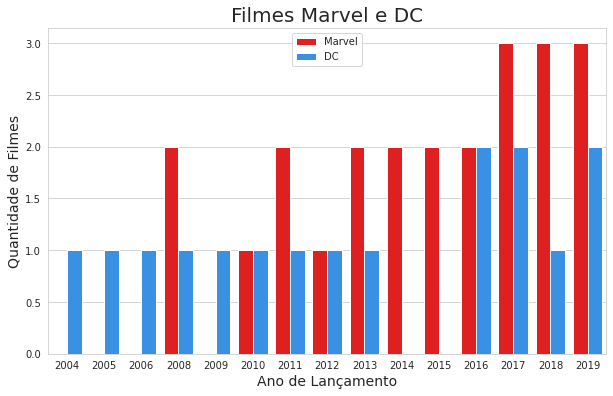

In [ ]:
# Gráfico propriamente dito
ax = sns.countplot(x="Release", hue='Company', palette=["red", "dodgerblue"],
                    data=db1)

# Configurando tamanho e títulos do nosso gráfico
ax.figure.set_size_inches(10,6)
ax.set_title("Filmes Marvel e DC", fontsize = 20)
ax.set_xlabel('Ano de Lançamento', fontsize = 14)
ax.set_ylabel('Quantidade de Filmes', fontsize = 14)

# Esse pedaço de código serve apenas para tirar o título da caixa de legendas
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

ax = ax

Apesar da constância da DC em lançar pelo menos um filme quase todo ano, a Marvel lançou bastante filmes nos últimos cinco anos.

Ok, você vai falar que isso não diz nada, mas e se analisarmos também a média da nota ao longo desses anos? Como ficaria o gráfico?

Para facilitar nossa vida, antes de plotar, temos que agrupar nossos dados pelo ano e calcular a média das notas.

Vamos agrupar nossos dados com a função **groupby()** e extrair a média com o trecho **agg(['mean'])**. Após isso, vamos renomear nossas colunas (linha 3).

In [ ]:
dados_por_ano = db1[['Rate']].groupby([db1['Release'], db1['Company']]).agg(['mean'])
dados_por_ano.reset_index(inplace=True)
dados_por_ano.columns = ['Ano', 'Compania', 'Média da Nota']
dados_por_ano.head()

,Ano,Compania,Média da Nota
0,2004,DC,3.3
1,2005,DC,8.2
2,2006,DC,6.0
3,2008,DC,9.0
4,2008,Marvel,7.3


Agora que agrupamos nossos dados, vamos plotar um gráfico de linha com o método **sns.lineplot()** do Seaborn.

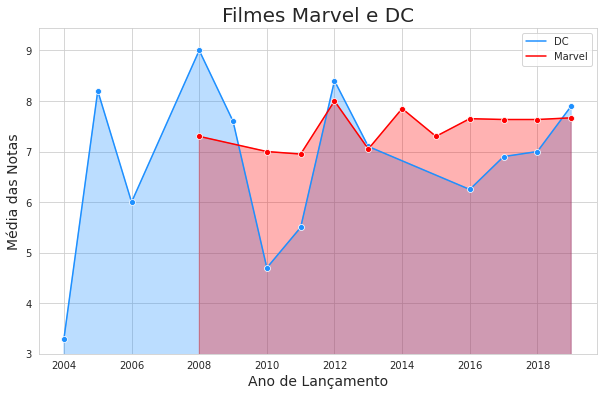

In [ ]:
# Gráfico propriamente dito
ax = sns.lineplot(x='Ano', y='Média da Nota', hue='Compania',
                  palette=["dodgerblue", "red"], marker='o',
                  data=dados_por_ano)


# Configurando tamanho e títulos do nosso gráfico
ax.figure.set_size_inches(10,6)
ax.set_title("Filmes Marvel e DC", fontsize = 20)
ax.set_xlabel('Ano de Lançamento', fontsize = 14)
ax.set_ylabel('Média das Notas', fontsize = 14)

# Recuperando as duas linhas do nosso gráfico de linha
l1 = ax.lines[0]
l2 = ax.lines[1]

# Preenchendo a área abaixo das linhas do gráfico
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1, y1, color="dodgerblue", alpha=0.3)
ax.fill_between(x2, y2, color="red", alpha=0.3)

# Esse pedaço de código serve apenas para tirar o título da caixa de legendas.
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

# Aqui nós setamos o eixo Y para começar no valor 3, para melhor visualização
# Mas cuidado! Quando você utiliza esse recurso,
# pode acabar confundindo quem lê o gráfico
ax.set_ylim(ymin=3)

ax = ax

Se analisarmos o código dos dois gráficos, percebemos que o **Seaborn** é bastante intuitivo e fácil de utilizar. 

Voltando à nossa discussão, no gráfico acima é fácil perceber que a DC tem diversos altos e baixos, enquanto que a Marvel possui praticamente a mesma média todos os anos, possuindo ~~qualidade~~ valor constante.

Ou seja, de acordo com todas as análises que fizemos até agora, podemos chegar a uma *breve* conclusão de que a Marvel ~sempre~ foi superior à DC.

![Image](https://media.giphy.com/media/7PezAC43dOks8/giphy.gif)

Aposto que você ainda não se convenceu, mas não se preocupe meu caro `fanboy`, faremos uma análise mais aprofundada no nosso próximo artigo. Iremos expandir nosso universo, analisando não apenas filmes e séries da Marvel e da DC, mas também conteúdo baseado nos quadrinhos dessas duas Companias.

E para isso, iremos utilizar algumas informações do próprio site do IMDB através de uma API bem interessante. Até lá!